In [1]:
#imports
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
img = Image.open('./Lenna.png')

# Convert the image to grayscale using 'L' mode
grayscale_img = img.convert('L')

In [3]:
"""Downsample the image by taking every other pixel in both x and y directions."""
img_array = np.array(grayscale_img)

# Downsample by taking every other pixel in both dimensions
downsampled_img_array = img_array[::2, ::2]

# Convert back to PIL Image
downsampled_img = Image.fromarray(downsampled_img_array)

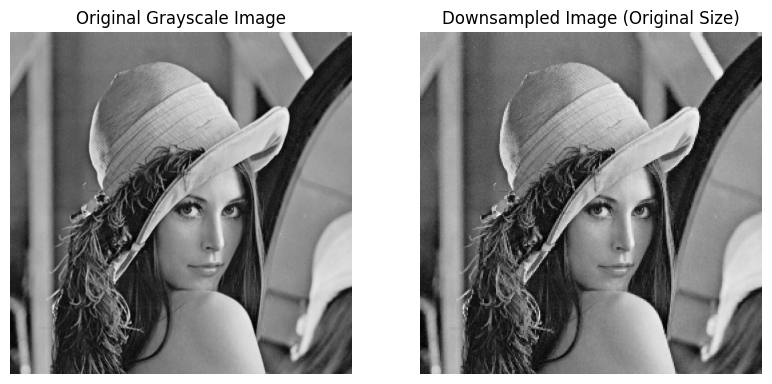

In [4]:
"""Comparison 1"""
plt.figure(figsize=(15, 5))

# Display original grayscale image
plt.subplot(1, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')

# Display downsampled image (scaled to original size for comparison)
plt.subplot(1, 3, 2)
plt.title("Downsampled Image (Original Size)")
plt.imshow(downsampled_img, cmap='gray')
plt.axis('off')

plt.show()

In [5]:
def upsample_image(downsampled_img, times):
    """Upsample the image by inserting empty pixels between each pixel."""
    img_array = np.array(downsampled_img)
    
    for _ in range(times):
        # Get current dimensions
        h, w = img_array.shape[0], img_array.shape[1]
        
        # Create a new array with twice the size, filled with zeros (empty pixels)
        upsampled_img_array = np.zeros((h * 2, w * 2), dtype=img_array.dtype)
        
        # Copy original pixels into the upsampled array at every other index
        upsampled_img_array[::2, ::2] = img_array
        
        # Update img_array for next iteration if upsampled multiple times
        img_array = upsampled_img_array
    
    # Convert back to PIL Image
    upsampled_img = Image.fromarray(upsampled_img_array)
    
    return upsampled_img

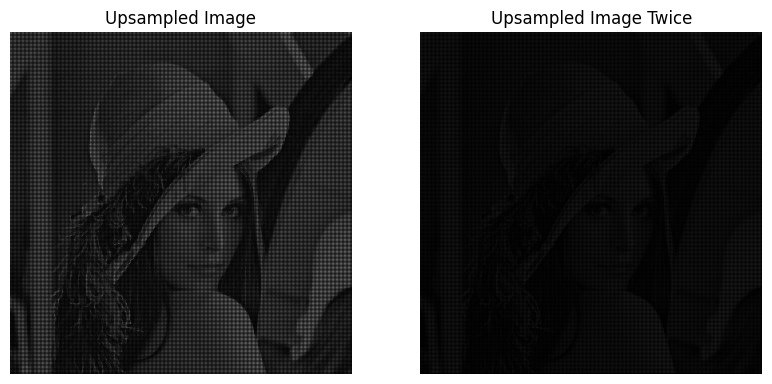

In [6]:
"""Comparison 2"""
plt.figure(figsize=(15, 5))

# Display upsampled image
plt.subplot(1, 3, 1)
plt.title("Upsampled Image")
plt.imshow(upsample_image(downsampled_img, 1), cmap='gray')
plt.axis('off')

# Display upsampled twice image
plt.subplot(1, 3, 2)
plt.title("Upsampled Image Twice")
plt.imshow(upsample_image(downsampled_img, 2), cmap='gray')
plt.axis('off')

plt.show()